In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__61_COMPLETE.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,7,1.5,1,10,0.05,0,2.776316,2.750000,0.000000,0.000000,0.310417,0.0625,0.00000,0.000000,15
1,1,1.5,1,10,0.05,0,2.631579,2.500000,0.000000,0.000000,0.347917,0.0875,0.00000,0.000000,19
2,4,1.5,1,10,0.05,0,2.605263,3.000000,0.000000,0.000000,0.304167,0.0125,0.00000,0.000000,13
3,6,1.5,1,10,0.15,0,2.808824,2.333333,0.029167,0.000000,0.257500,0.1125,0.00000,0.000000,17
4,12,1.5,1,40,0.15,0,1.882353,2.250000,0.037500,0.000000,0.341667,0.0125,0.00000,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,162,5.5,5,40,0.15,86,2.852941,3.166667,0.710870,1.570570,0.649599,22.5375,1.31844,1.077992,1357
14738,162,5.5,5,40,0.15,87,3.250000,3.583333,0.713088,1.567405,0.651124,22.4125,0.99344,0.765492,1367
14739,162,5.5,5,40,0.15,88,2.764706,3.250000,0.713999,1.564557,0.652444,22.3000,0.73094,1.102992,1376
14740,162,5.5,5,40,0.15,89,2.867647,2.833333,0.714271,1.562342,0.653467,22.2125,0.61844,0.627992,1383


In [4]:
df_move=df4.groupby(['radius-of-interaction','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0         2.375313        2.405864      0.022029   
                      1         2.676820        2.731481      0.035995   
                      2         2.798982        2.857253      0.053017   
                      3         2.893489        2.974537      0.063557   
                      4         2.761939        2.856481      0.069691   
...                                  ...             ...           ...   
5.5                   86        2.832090        2.743056      0.670183   
                      87        2.860476        2.827160      0.670606   
                      88        2.774804        2.764660      0.671520   
                      89        2.721263        2.710648      0.672089   
                      90        2.937266        2.901235      0.672866   

                               paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                                 
1.5                   0     0.000000   0.298373     0.057870    0.000000   
                      1     0.000000   0.360343     0.178704   -0.334756   
                      2     0.000000   0.387997     0.307639   -0.327793   
                      3     0.000000   0.409521     0.555324   -0.318563   
                      4     0.000000   0.418883     0.941898   -0.297909   
...                              ...        ...          ...         ...   
5.5                   86    1.844673   0.522742    40.717361    0.040052   
                      87    1.839932   0.523891    40.525231    0.035654   
                      88    1.835613   0.525065    40.310417    0.049080   
                      89    1.831974   0.526067    40.165741    0.018293   
                      90    1.829337   0.526839    40.059028    0.021534   

                            centroid-y       links  
radius-of-interaction step                          
1.5                   0       0.000000   15.240741  
                      1       0.070847   21.370370  
                      2       0.091928   25.500000  
                      3       0.102239   29.777778  
                      4       0.124579   32.944444  
...                                ...         ...  
5.5                   86     -0.278331  809.074074  
                      87     -0.285044  813.185185  
                      88     -0.274396  817.444444  
                      89     -0.292914  821.370370  
                      90     -0.257034  825.222222  

[273 rows x 9 columns]

In [5]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [6]:
df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0         2.375313        2.405864      0.022029   
                      1         2.676820        2.731481      0.035995   
                      2         2.798982        2.857253      0.053017   
                      3         2.893489        2.974537      0.063557   
                      4         2.761939        2.856481      0.069691   
...                                  ...             ...           ...   
5.5                   86        2.832090        2.743056      0.670183   
                      87        2.860476        2.827160      0.670606   
                      88        2.774804        2.764660      0.671520   
                      89        2.721263        2.710648      0.672089   
                      90        2.937266        2.901235      0.672866   

                               paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                                 
1.5                   0     0.000000   0.298373     0.057870    0.000000   
                      1     0.000000   0.360343     0.178704   -0.334756   
                      2     0.000000   0.387997     0.307639   -0.327793   
                      3     0.000000   0.409521     0.555324   -0.318563   
                      4     0.000000   0.418883     0.941898   -0.297909   
...                              ...        ...          ...         ...   
5.5                   86    1.844673   0.522742    40.717361    0.040052   
                      87    1.839932   0.523891    40.525231    0.035654   
                      88    1.835613   0.525065    40.310417    0.049080   
                      89    1.831974   0.526067    40.165741    0.018293   
                      90    1.829337   0.526839    40.059028    0.021534   

                            centroid-y       links  total_mood  
radius-of-interaction step                                      
1.5                   0       0.000000   15.240741    4.781177  
                      1       0.070847   21.370370    5.408302  
                      2       0.091928   25.500000    5.656235  
                      3       0.102239   29.777778    5.868026  
                      4       0.124579   32.944444    5.618420  
...                                ...         ...         ...  
5.5                   86     -0.278331  809.074074    5.575146  
                      87     -0.285044  813.185185    5.687636  
                      88     -0.274396  817.444444    5.539464  
                      89     -0.292914  821.370370    5.431911  
                      90     -0.257034  825.222222    5.838500  

[273 rows x 10 columns]

In [7]:
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5]['links']

0      15.240741
1      21.370370
2      25.500000
3      29.777778
4      32.944444
         ...    
86    206.814815
87    208.944444
88    211.055556
89    213.333333
90    215.555556
Name: links, Length: 91, dtype: float64

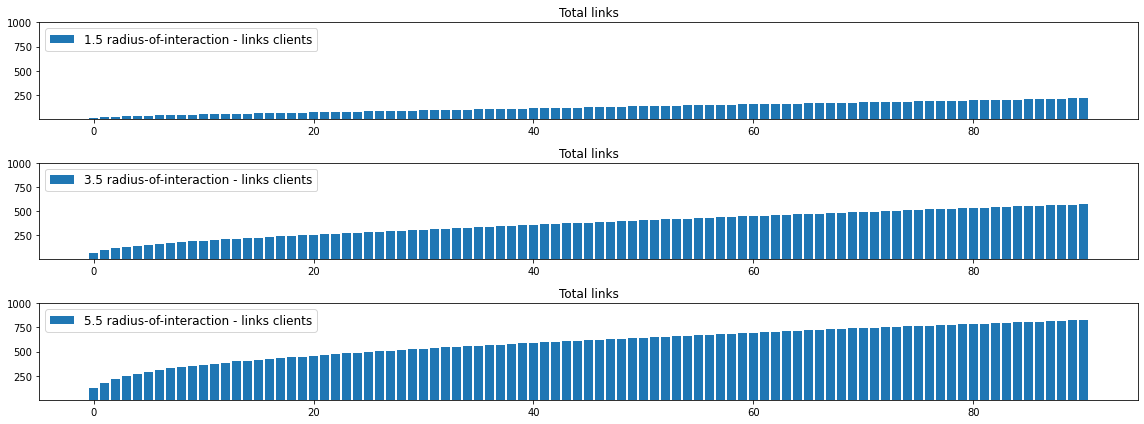

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['links'], label='{} radius-of-interaction - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,1000)
plt.show()

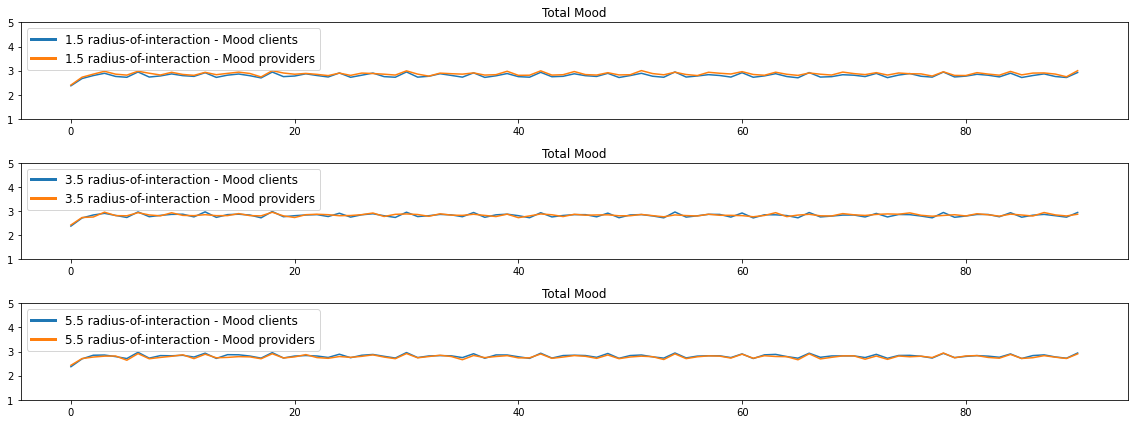

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['mood_clients'], label='{} radius-of-interaction - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['mood_providers'], label='{} radius-of-interaction - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



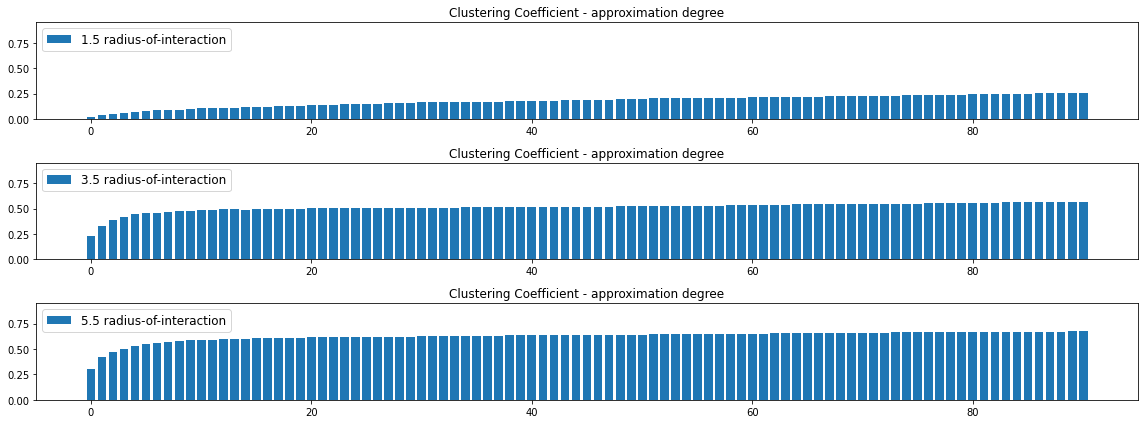

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['cluster_coef'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.95)
plt.show()



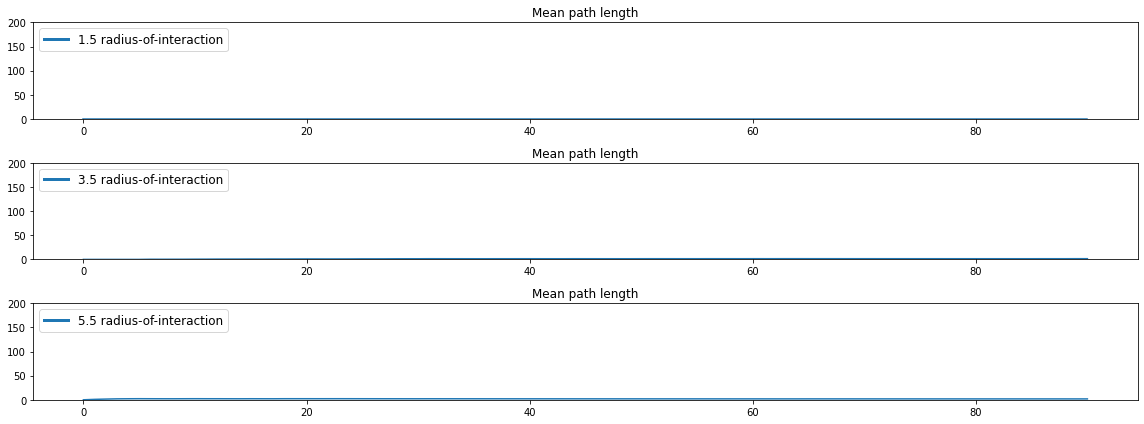

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['paths'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



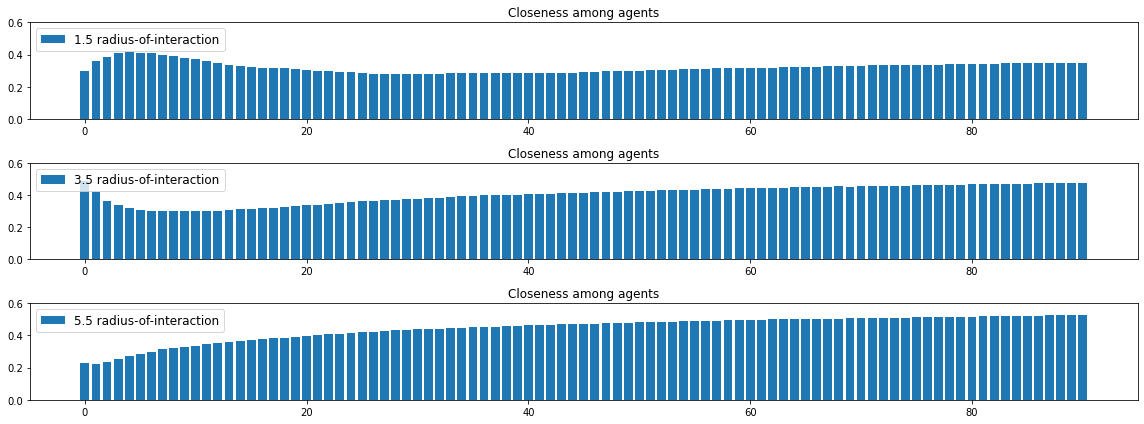

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['closeness'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



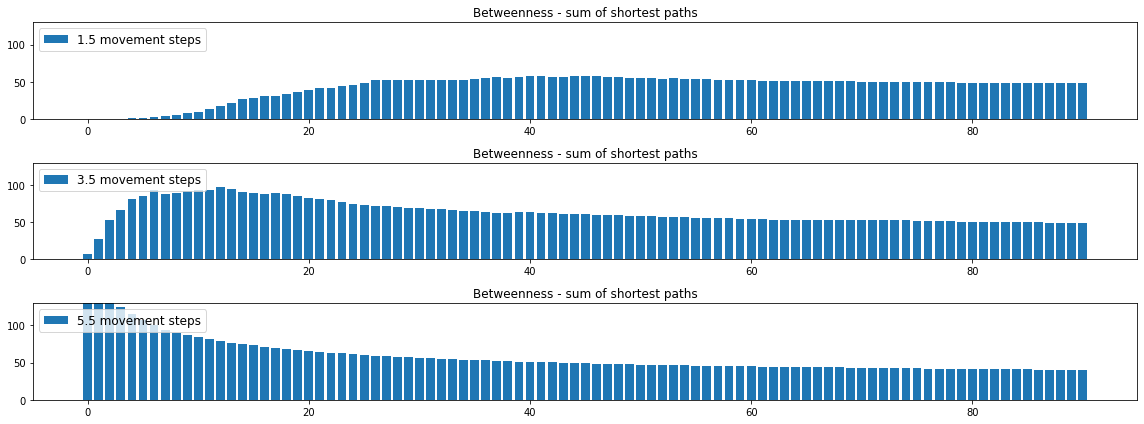

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['betweenness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,130)
plt.show()


In [14]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5].mean()

In [15]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [16]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-0.5794,0.563
1,mood_providers,7.6507,0.0
2,cluster_coef,-54.0878,0.0
3,paths,-67.3143,0.0
4,closeness,-13.8258,0.0
5,betweenness,-4.9351,0.0
6,centroid-x,-21.3759,0.0
7,centroid-y,32.0109,0.0
8,links,-25.0244,0.0
9,total_mood,3.4494,0.0007


In [17]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,0.3357,0.563
1,mood_providers,58.5335,0.0
2,cluster_coef,2925.4885,0.0
3,paths,4531.215,0.0
4,closeness,191.1524,0.0
5,betweenness,24.3553,0.0
6,centroid-x,456.9277,0.0
7,centroid-y,1024.6965,0.0
8,links,626.223,0.0
9,total_mood,11.8984,0.0007


In [18]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.3980
mood_providers    0.2584
cluster_coef      0.9651
paths                NaN
closeness        -0.8428
betweenness      -0.9666
total_mood        0.9975
centroid-x       -0.5861
centroid-y       -0.9234
dtype: float64

In [19]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']

df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients      0.0781
mood_providers    0.0999
cluster_coef      0.7325
paths            -0.4140
closeness         0.9804
betweenness       0.9261
total_mood        0.9762
centroid-x       -0.0700
centroid-y       -0.0588
dtype: float64

In [20]:
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:].shape

(30, 10)

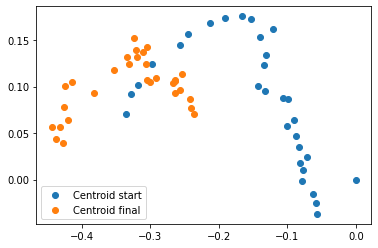

In [21]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

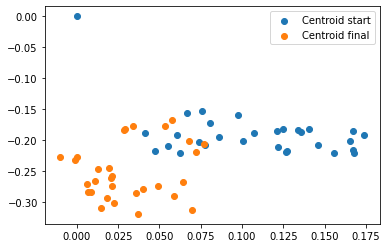

In [22]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [23]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0           2.3753          2.4059        0.0220   
                      1           2.6768          2.7315        0.0360   
                      2           2.7990          2.8573        0.0530   
                      3           2.8935          2.9745        0.0636   
                      4           2.7619          2.8565        0.0697   
...                                  ...             ...           ...   
5.5                   86          2.8321          2.7431        0.6702   
                      87          2.8605          2.8272        0.6706   
                      88          2.7748          2.7647        0.6715   
                      89          2.7213          2.7106        0.6721   
                      90          2.9373          2.9012        0.6729   

                             paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                               
1.5                   0     0.0000     0.2984       0.0579      0.0000   
                      1     0.0000     0.3603       0.1787     -0.3348   
                      2     0.0000     0.3880       0.3076     -0.3278   
                      3     0.0000     0.4095       0.5553     -0.3186   
                      4     0.0000     0.4189       0.9419     -0.2979   
...                            ...        ...          ...         ...   
5.5                   86    1.8447     0.5227      40.7174      0.0401   
                      87    1.8399     0.5239      40.5252      0.0357   
                      88    1.8356     0.5251      40.3104      0.0491   
                      89    1.8320     0.5261      40.1657      0.0183   
                      90    1.8293     0.5268      40.0590      0.0215   

                            centroid-y     links  total_mood  
radius-of-interaction step                                    
1.5                   0         0.0000   15.2407      4.7812  
                      1         0.0708   21.3704      5.4083  
                      2         0.0919   25.5000      5.6562  
                      3         0.1022   29.7778      5.8680  
                      4         0.1246   32.9444      5.6184  
...                                ...       ...         ...  
5.5                   86       -0.2783  809.0741      5.5751  
                      87       -0.2850  813.1852      5.6876  
                      88       -0.2744  817.4444      5.5395  
                      89       -0.2929  821.3704      5.4319  
                      90       -0.2570  825.2222      5.8385  

[273 rows x 10 columns]

In [24]:
lag=7

/tmp/ipykernel_60131/3536025256.py:46: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


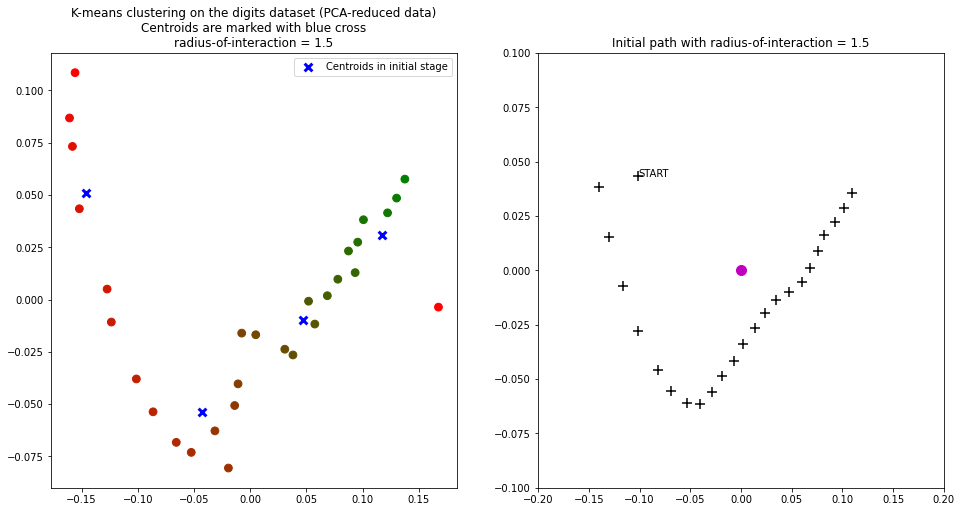

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)


c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)



centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 1.5"
)
plt.legend()
plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [32]:
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1].shape

(0, 12)

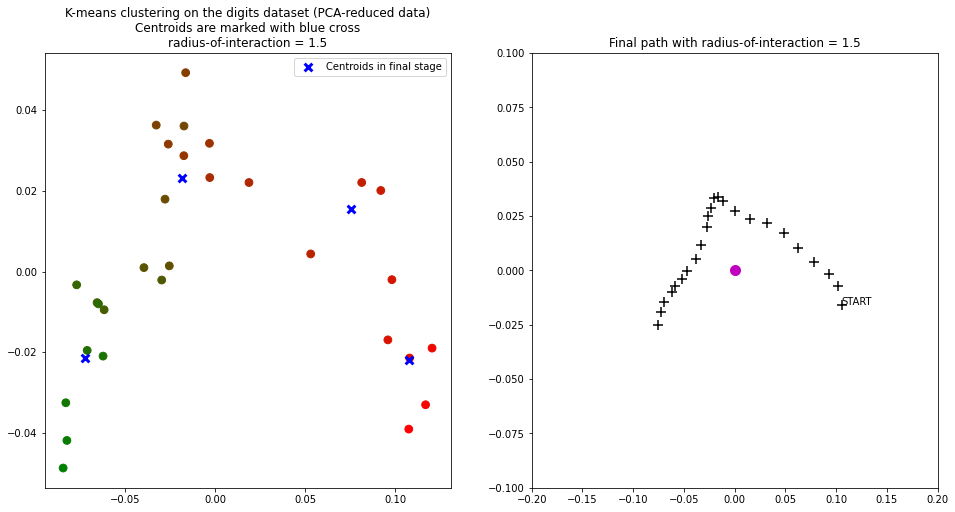

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 1.5"
)
plt.legend()
plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',s=90)
plt.title("Final path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.2,0.2)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

In [35]:
reduced_data[0, 0]

0.10768083930185164

/tmp/ipykernel_60131/2535280355.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


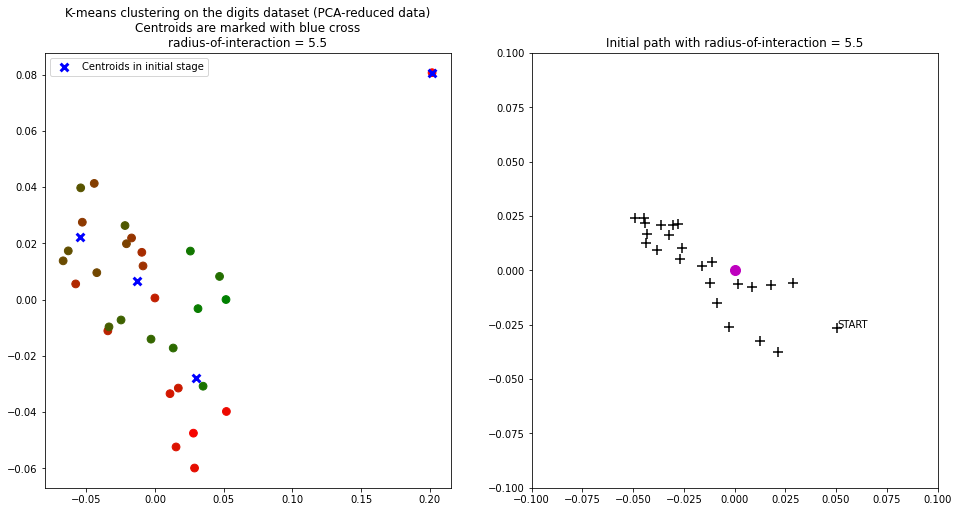

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 5.5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 5.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_60131/2369690354.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


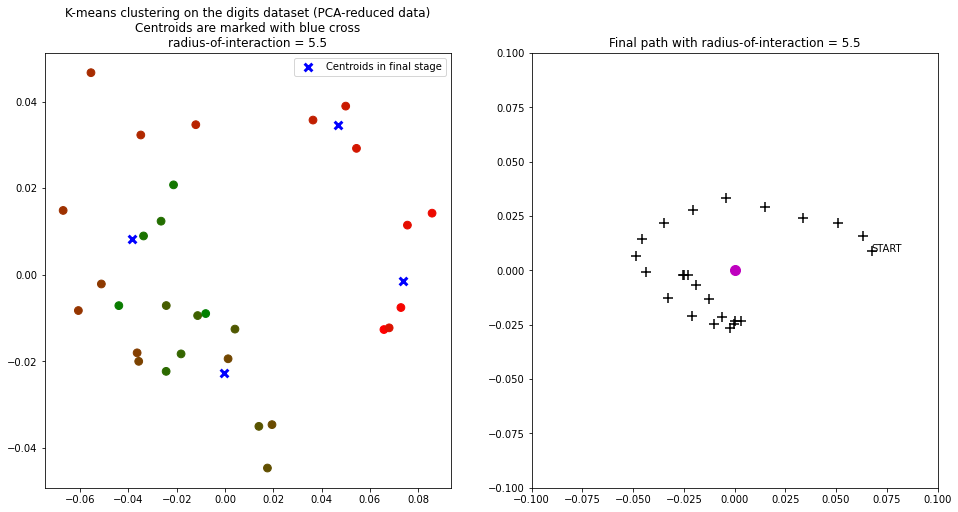

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 5.5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Final path with radius-of-interaction = 5.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()